,run_id,response_variable,treatment,test_statistic,p_value,test_performed
0,05ffec0b,frontend_traces.duration,pause_recommendation,-4.001300,6.319191e-05,welch t-test
1,05ffec0b,recommendation_traces.duration,pause_recommendation,-2.450257,1.429674e-02,welch t-test
2,05ffec0b,recommendations_total,pause_recommendation,-1.239657,2.165771e-01,welch t-test
3,24b83c5b,frontend_traces.duration,pause_recommendation,-4.798171,1.611441e-06,welch t-test
4,24b83c5b,recommendation_traces.duration,pause_recommendation,-3.001570,2.694583e-03,welch t-test
5,24b83c5b,recommendations_total,pause_recommendation,31.926640,1.909583e-80,welch t-test
6,45c142cf,frontend_traces.duration,pause_recommendation,-5.481322,4.274176e-08,welch t-test
7,45c142cf,recommendation_traces.duration,pause_recommendation,-2.829997,4.669551e-03,welch t-test
8,45c142cf,recommendations_total,pause_recommendation,18.081115,3.708228e-54,welch t-test
9,916ba81a,frontend_traces.duration,pause_recommendation,1.905653,5.784560e-02,welch t-test


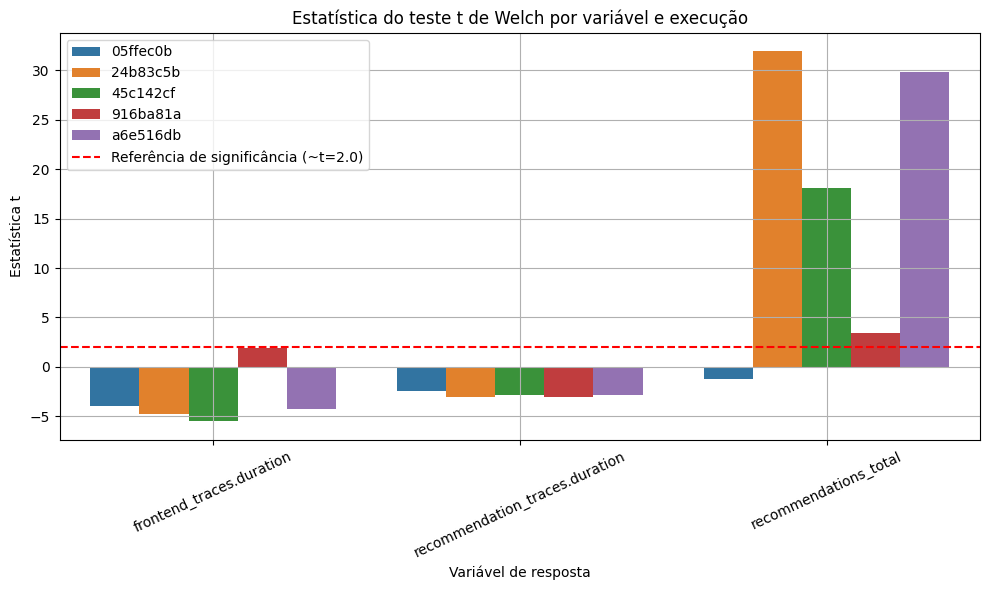

In [25]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


with open("pause_multi_report.yml", "r") as f:
    data = yaml.safe_load(f)


runs = data["report"]["runs"]
records = []

for run_id, run_data in runs.items():
    interactions = run_data["interactions"]
    for name, details in interactions.items():
        records.append({
            "run_id": run_id,
            "treatment": details["treatment_name"],
            "response_variable": details["response_name"],
            "test_statistic": float(details["test_statistic"]),
            "p_value": float(details["p_value"]),
            "test_performed": details["test_performed"]
        })

# Criar DataFrame com os dados
df = pd.DataFrame(records)

df = df.groupby(["run_id", "response_variable"]).last().reset_index()

# Visualizar os dados
display(df)

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="response_variable", y="test_statistic", hue="run_id")

# Linha de referência para significância estatística (~95%)
plt.axhline(2.0, color="red", linestyle="--", label="Referência de significância (~t=2.0)")

plt.title("Estatística do teste t de Welch por variável e execução")
plt.xlabel("Variável de resposta")
plt.ylabel("Estatística t")
plt.xticks(rotation=25)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


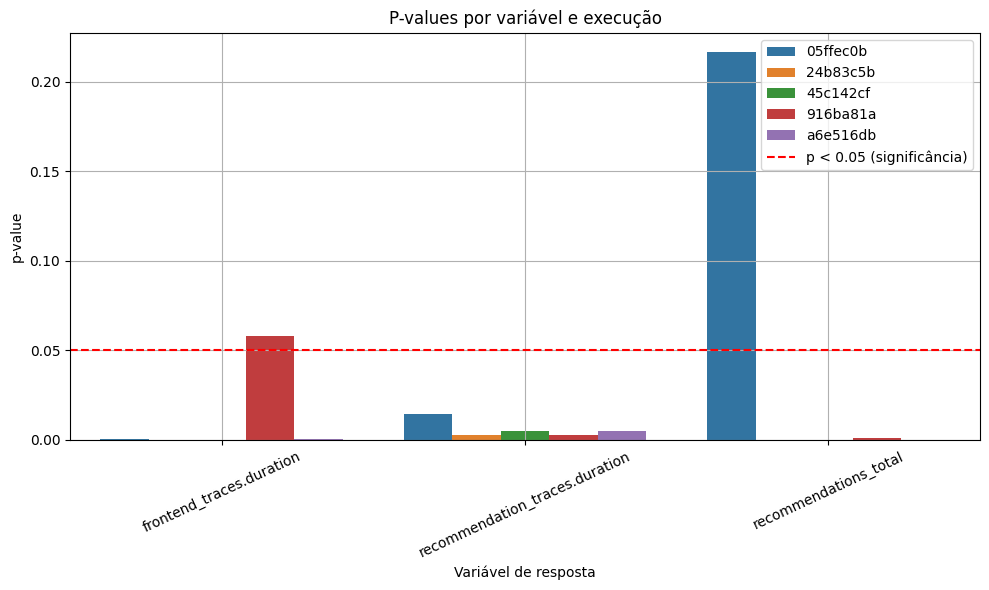

In [26]:
# 1. Gráfico de barras dos p-values
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="response_variable", y="p_value", hue="run_id")
plt.axhline(0.05, color="red", linestyle="--", label="p < 0.05 (significância)")
plt.title("P-values por variável e execução")
plt.ylabel("p-value")
plt.xlabel("Variável de resposta")
plt.xticks(rotation=25)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




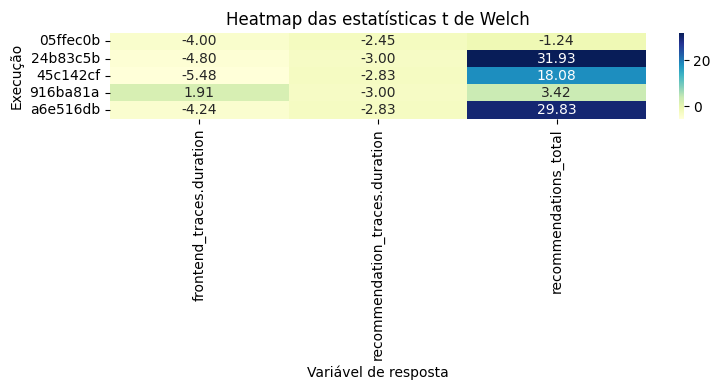

In [27]:
# 2. Heatmap com t-statistics
pivot_t = df.pivot(index="run_id", columns="response_variable", values="test_statistic")
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_t, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap das estatísticas t de Welch")
plt.ylabel("Execução")
plt.xlabel("Variável de resposta")
plt.tight_layout()
plt.show()



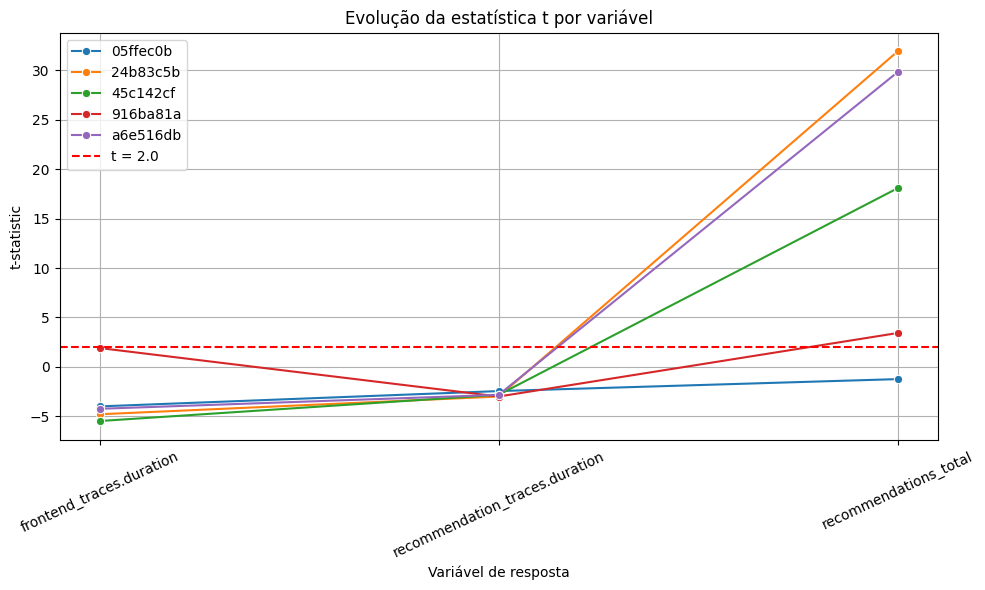

In [28]:
# 3. Gráfico de linhas para mostrar variação da estatística t
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="response_variable", y="test_statistic", hue="run_id", marker="o")
plt.axhline(2.0, color="red", linestyle="--", label="t = 2.0")
plt.title("Evolução da estatística t por variável")
plt.ylabel("t-statistic")
plt.xlabel("Variável de resposta")
plt.xticks(rotation=25)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()